In [243]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import io
import seaborn as sns
import matplotlib.ticker as mtick

In [244]:
#url variables
politician_data_csv_url = "https://raw.githubusercontent.com/willcutchin/bills-for-bills/main/data-sets/politician-trading-data/politician-trading-data-csv/politician-trading-data-BUY2020-final.csv"

#download csv
pol_download = requests.get(politician_data_csv_url).content

In [245]:
#read file to data frame
pol_df = pd.read_csv(io.StringIO(pol_download.decode('utf-8')))

In [246]:
#Drop NA from 12
pol_df = pol_df[pol_df.PERCENT_CHANGE_12_MONTH != '#DIV/0!']
pol_df = pol_df.dropna(subset=['PERCENT_CHANGE_12_MONTH'])

#Drop NA from 6
pol_df = pol_df[pol_df.PERCENT_CHANGE_6_MONTH != '#DIV/0!']
pol_df = pol_df.dropna(subset=['PERCENT_CHANGE_6_MONTH'])

#Drop NA from 3
pol_df = pol_df[pol_df.PERCENT_CHANGE_3_MONTH != '#DIV/0!']
pol_df = pol_df.dropna(subset=['PERCENT_CHANGE_3_MONTH'])

#make int
pol_df['PERCENT_CHANGE_12_MONTH'] = pd.to_numeric(pol_df['PERCENT_CHANGE_12_MONTH'], downcast="integer")
pol_df['PERCENT_CHANGE_6_MONTH'] = pd.to_numeric(pol_df['PERCENT_CHANGE_6_MONTH'], downcast="integer")
pol_df['PERCENT_CHANGE_3_MONTH'] = pd.to_numeric(pol_df['PERCENT_CHANGE_3_MONTH'], downcast="integer")

In [247]:
#create data frame with percent change
pol_change_df_12 = pol_df[["PERCENT_CHANGE_12_MONTH"]]
pol_change_df_6 = pol_df[["PERCENT_CHANGE_6_MONTH"]]
pol_change_df_3 = pol_df[["PERCENT_CHANGE_3_MONTH"]]

In [248]:
max_quant = 0.95
min_quant = 0.05

In [249]:
min_thresh, max_thresh = pol_change_df_12["PERCENT_CHANGE_12_MONTH"].quantile([min_quant,max_quant])
pol_change_df_12 = pol_change_df_12.loc[(pol_change_df_12.PERCENT_CHANGE_12_MONTH<max_thresh)&(pol_change_df_12.PERCENT_CHANGE_12_MONTH>min_thresh)]
pol_change_df_12.dropna()

,PERCENT_CHANGE_12_MONTH
334,28.88
335,27.48
336,80.24
337,66.72
338,16.20
...,...
6167,-7.49
6170,49.96
6172,-13.10
6173,72.34


In [250]:
min_thresh, max_thresh = pol_change_df_6["PERCENT_CHANGE_6_MONTH"].quantile([min_quant,max_quant])
pol_change_df_6 = pol_change_df_6.loc[(pol_change_df_6.PERCENT_CHANGE_6_MONTH<max_thresh)&(pol_change_df_6.PERCENT_CHANGE_6_MONTH>min_thresh)]
pol_change_df_6.dropna()

,PERCENT_CHANGE_6_MONTH
333,-16.66
334,28.67
335,22.32
336,-7.12
337,43.89
...,...
6163,-6.50
6165,-19.56
6169,-25.95
6170,-1.68


In [251]:
min_thresh, max_thresh = pol_change_df_3["PERCENT_CHANGE_3_MONTH"].quantile([min_quant,max_quant])
pol_change_df_3 = pol_change_df_3.loc[(pol_change_df_3.PERCENT_CHANGE_3_MONTH<max_thresh)&(pol_change_df_3.PERCENT_CHANGE_3_MONTH>min_thresh)]
pol_change_df_3.dropna()

,PERCENT_CHANGE_3_MONTH
333,-8.23
334,3.75
335,6.74
336,-1.32
337,22.36
...,...
6162,-4.93
6163,-31.57
6165,-23.40
6170,-25.90


In [252]:
pol_change_df = pd.DataFrame()

In [253]:
pol_change_df = pd.concat([pol_change_df,pol_change_df_12])
pol_change_df = pd.concat([pol_change_df,pol_change_df_6])
pol_change_df = pd.concat([pol_change_df,pol_change_df_3])
pol_change_df.head()

,PERCENT_CHANGE_12_MONTH,PERCENT_CHANGE_6_MONTH,PERCENT_CHANGE_3_MONTH
334,28.88,NaN,NaN
335,27.48,NaN,NaN
336,80.24,NaN,NaN
337,66.72,NaN,NaN
338,16.20,NaN,NaN


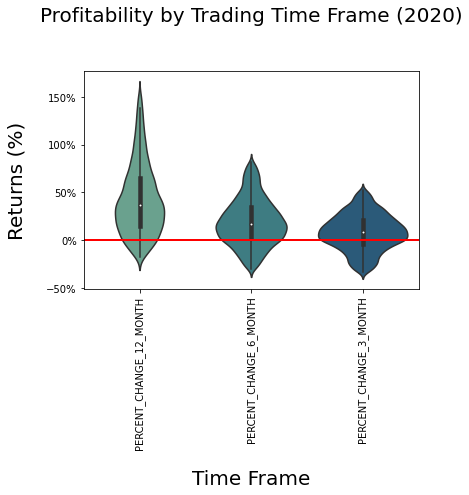

In [260]:
palette = sns.color_palette("crest",3)
ax = sns.violinplot(data=pol_change_df, palette=palette)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90,fontsize=10)
ax.axhline(0,color="red",linestyle="-",lw=2)
ax.set_xlabel("Time Frame",fontsize=20,labelpad=20)
ax.set_ylabel("Returns (%)",fontsize=20,labelpad=20)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90,fontsize=10)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_title("Profitability by Trading Time Frame (2020)", fontsize=20, pad=50)
plt.savefig('bfb_visualization_3_violin',pad_inches=0.1,transparent=False)